# Health Insurance Claims Fraud Detection Using Machine Learning

In [1]:
# Necessary libraries
import pandas as pd # for data manipulation and analysis
import numpy as np # for array calculations
import matplotlib.pyplot as plt # for data visualization
import seaborn as sns # for data visualization
import warnings # for suppressing warnings
warnings.filterwarnings('ignore') 

# set max_columns to None, to display all the columns of the dataframe
pd.options.display.max_columns = None

# 1. Loading the Data

In [2]:
# Loading CSV files
train = pd.read_csv('C:/claims_fraud_datasets/Train-1542865627584.csv')
train_beneficiary = pd.read_csv('C:/claims_fraud_datasets/Train_Beneficiarydata-1542865627584.csv')
train_inpatient = pd.read_csv('C:/claims_fraud_datasets/Train_Inpatientdata-1542865627584.csv')
train_outpatient = pd.read_csv('C:/claims_fraud_datasets/Train_Outpatientdata-1542865627584.csv')

# 2. Understanding the Data

# 2.1. Beneficiary Data

 Beneficiary data inspection

In [3]:
# First 5 rows of the beneficiary training dataset
train_beneficiary.head()

,BeneID,DOB,DOD,Gender,Race,RenalDiseaseIndicator,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,ChronicCond_Alzheimer,ChronicCond_Heartfailure,ChronicCond_KidneyDisease,ChronicCond_Cancer,ChronicCond_ObstrPulmonary,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt
0,BENE11001,1943-01-01,NaN,1,1,0,39,230,12,12,1,2,1,2,2,1,1,1,2,1,1,36000,3204,60,70
1,BENE11002,1936-09-01,NaN,2,1,0,39,280,12,12,2,2,2,2,2,2,2,2,2,2,2,0,0,30,50
2,BENE11003,1936-08-01,NaN,1,1,0,52,590,12,12,1,2,2,2,2,2,2,1,2,2,2,0,0,90,40
3,BENE11004,1922-07-01,NaN,1,1,0,39,270,12,12,1,1,2,2,2,2,1,1,1,1,2,0,0,1810,760
4,BENE11005,1935-09-01,NaN,1,1,0,24,680,12,12,2,2,2,2,1,2,1,2,2,2,2,0,0,1790,1200


In [4]:
# Dimension of the beneficiary training dataset
train_beneficiary.shape

(138556, 25)

- There are 138556 rows and 25 columns in the beneficiary train set

In [5]:
# Data columns of beneficiary training dataset
train_beneficiary.columns

Index(['BeneID', 'DOB', 'DOD', 'Gender', 'Race', 'RenalDiseaseIndicator',
       'State', 'County', 'NoOfMonths_PartACov', 'NoOfMonths_PartBCov',
       'ChronicCond_Alzheimer', 'ChronicCond_Heartfailure',
       'ChronicCond_KidneyDisease', 'ChronicCond_Cancer',
       'ChronicCond_ObstrPulmonary', 'ChronicCond_Depression',
       'ChronicCond_Diabetes', 'ChronicCond_IschemicHeart',
       'ChronicCond_Osteoporasis', 'ChronicCond_rheumatoidarthritis',
       'ChronicCond_stroke', 'IPAnnualReimbursementAmt',
       'IPAnnualDeductibleAmt', 'OPAnnualReimbursementAmt',
       'OPAnnualDeductibleAmt'],
      dtype='object')

In [6]:
# General information of the beneficiary training dataset
train_beneficiary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138556 entries, 0 to 138555
Data columns (total 25 columns):
 #   Column                           Non-Null Count   Dtype 
---  ------                           --------------   ----- 
 0   BeneID                           138556 non-null  object
 1   DOB                              138556 non-null  object
 2   DOD                              1421 non-null    object
 3   Gender                           138556 non-null  int64 
 4   Race                             138556 non-null  int64 
 5   RenalDiseaseIndicator            138556 non-null  object
 6   State                            138556 non-null  int64 
 7   County                           138556 non-null  int64 
 8   NoOfMonths_PartACov              138556 non-null  int64 
 9   NoOfMonths_PartBCov              138556 non-null  int64 
 10  ChronicCond_Alzheimer            138556 non-null  int64 
 11  ChronicCond_Heartfailure         138556 non-null  int64 
 12  ChronicCond_Kidn

- The different columns of the beneficiary training dataset consist of; int64(21) and object(4) data types

In [7]:
# Race, State, County, NoOfMonths_PartACov and NoOfMonths_PartBCov columns are dropped, since they are not important for this project
train_beneficiary.drop(
    columns = ['Race', 'State', 'County', 'NoOfMonths_PartACov', 'NoOfMonths_PartBCov'], 
    inplace = True
)

In [8]:
# Remaining columns
train_beneficiary.columns

Index(['BeneID', 'DOB', 'DOD', 'Gender', 'RenalDiseaseIndicator',
       'ChronicCond_Alzheimer', 'ChronicCond_Heartfailure',
       'ChronicCond_KidneyDisease', 'ChronicCond_Cancer',
       'ChronicCond_ObstrPulmonary', 'ChronicCond_Depression',
       'ChronicCond_Diabetes', 'ChronicCond_IschemicHeart',
       'ChronicCond_Osteoporasis', 'ChronicCond_rheumatoidarthritis',
       'ChronicCond_stroke', 'IPAnnualReimbursementAmt',
       'IPAnnualDeductibleAmt', 'OPAnnualReimbursementAmt',
       'OPAnnualDeductibleAmt'],
      dtype='object')

Beneficiary data columns:
1. BeneID - unique identifier of the registered health insurance beneficiary.
2. DOB - date of birth of health insurance beneficiary.
3. Gender - numeric gender code of health insurance beneficiary.
4. RenalDiseaseIndicator - indicate whether the health insurance beneficiary has any problem related to kidney failure or not.
5. Chronic Conditions - indicate whether the beneficiary has chronic conditions related to Alzheimer’s, heart failure, kidney disease, cancer, obstructive pulmonary, depression, diabetes, ischemic heart disease, osteoporasis, rheumatoid arthritis, and stroke.
6. IPAnnualReimbursementAmt - annual amount reimbursed for the treatment of the health insurance beneficiary when admitted to the hospital.
7. IPAnnualDeductibleAmt -  annual premium amount paid to the health insurance provider towards the treatment of the beneficiary when he/she was admitted to the hospital.
8. OPAnnualReimbursementAmt - annual amount reimbursed for the treatment of the health insurnace beneficiary when he/she visited the hospital but not admitted.
9. OPAnnualDeductibleAmt - annual premium amount paid to the health insurance provider towards the treatment of the beneficiary when he/she visited the hospital but was not admitted.

# 2.2. Inpatient Data

Inpatient data inspection

In [9]:
# First 5 rows of inpatient training dataset
train_inpatient.head()

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,ClmAdmitDiagnosisCode,DeductibleAmtPaid,DischargeDt,DiagnosisGroupCode,ClmDiagnosisCode_1,ClmDiagnosisCode_2,ClmDiagnosisCode_3,ClmDiagnosisCode_4,ClmDiagnosisCode_5,ClmDiagnosisCode_6,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6
0,BENE11001,CLM46614,2009-04-12,2009-04-18,PRV55912,26000,PHY390922,NaN,NaN,2009-04-12,7866,1068.0,2009-04-18,201,1970,4019,5853,7843,2768,71590,2724,19889,5849,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,BENE11001,CLM66048,2009-08-31,2009-09-02,PRV55907,5000,PHY318495,PHY318495,NaN,2009-08-31,6186,1068.0,2009-09-02,750,6186,2948,56400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7092.0,NaN,NaN,NaN,NaN,NaN
2,BENE11001,CLM68358,2009-09-17,2009-09-20,PRV56046,5000,PHY372395,NaN,PHY324689,2009-09-17,29590,1068.0,2009-09-20,883,29623,30390,71690,34590,V1581,32723,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,BENE11011,CLM38412,2009-02-14,2009-02-22,PRV52405,5000,PHY369659,PHY392961,PHY349768,2009-02-14,431,1068.0,2009-02-22,067,43491,2762,7843,32723,V1041,4254,25062,40390,4019,NaN,331.0,NaN,NaN,NaN,NaN,NaN
4,BENE11014,CLM63689,2009-08-13,2009-08-30,PRV56614,10000,PHY379376,PHY398258,NaN,2009-08-13,78321,1068.0,2009-08-30,975,042,3051,34400,5856,42732,486,5119,29620,20300,NaN,3893.0,NaN,NaN,NaN,NaN,NaN


In [10]:
# Dimension of the inpatient training dataset
train_inpatient.shape

(40474, 30)

- There are 40474 rows and 30 columns in the inpatient training dataset

In [11]:
# Data columns of the inpatient training dataset
train_inpatient.columns

Index(['BeneID', 'ClaimID', 'ClaimStartDt', 'ClaimEndDt', 'Provider',
       'InscClaimAmtReimbursed', 'AttendingPhysician', 'OperatingPhysician',
       'OtherPhysician', 'AdmissionDt', 'ClmAdmitDiagnosisCode',
       'DeductibleAmtPaid', 'DischargeDt', 'DiagnosisGroupCode',
       'ClmDiagnosisCode_1', 'ClmDiagnosisCode_2', 'ClmDiagnosisCode_3',
       'ClmDiagnosisCode_4', 'ClmDiagnosisCode_5', 'ClmDiagnosisCode_6',
       'ClmDiagnosisCode_7', 'ClmDiagnosisCode_8', 'ClmDiagnosisCode_9',
       'ClmDiagnosisCode_10', 'ClmProcedureCode_1', 'ClmProcedureCode_2',
       'ClmProcedureCode_3', 'ClmProcedureCode_4', 'ClmProcedureCode_5',
       'ClmProcedureCode_6'],
      dtype='object')

In [12]:
# General information of the inpatient training dataset
train_inpatient.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40474 entries, 0 to 40473
Data columns (total 30 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   BeneID                  40474 non-null  object 
 1   ClaimID                 40474 non-null  object 
 2   ClaimStartDt            40474 non-null  object 
 3   ClaimEndDt              40474 non-null  object 
 4   Provider                40474 non-null  object 
 5   InscClaimAmtReimbursed  40474 non-null  int64  
 6   AttendingPhysician      40362 non-null  object 
 7   OperatingPhysician      23830 non-null  object 
 8   OtherPhysician          4690 non-null   object 
 9   AdmissionDt             40474 non-null  object 
 10  ClmAdmitDiagnosisCode   40474 non-null  object 
 11  DeductibleAmtPaid       39575 non-null  float64
 12  DischargeDt             40474 non-null  object 
 13  DiagnosisGroupCode      40474 non-null  object 
 14  ClmDiagnosisCode_1      40474 non-null

- The different columns of the inpatient training dataset consist of; float64(7), int64(1) and object(22) data types

Inpatient data columns:
1. BeneID - Unique identifier of each health insurance beneficiary.
2. ClaimID - Unique identifier of the health insurance claim.
3. ClaimStartDt and ClaimEndDt - When the insurance claim was submitted and when it was settled and closed.
4. Provider - Unique identifier for a healthcare provider.
5. InscClaimAmtReimbursed - Amount reimbursed by the health insurance provider for the healthcare services provided to the beneficiary.
6. AttendingPhysician, OperatingPhysician and OtherPhysician - Physicians who attended the beneficiary/patient, operated the patient, and any other physicians if any.
7. AdmissionDt and DischargeDt - Dates on which the beneficiary was admitted to the hospital and when he was discharged.
8. ClmAdmitDiagnosisCode - Diagnosis code indicating the beneficiary’s initial diagnosis at admission.
9. DeductibleAmtPaid - Amount the beneficiary has to pay as part of the claim. It is the total claim amount minus the reimbursed amount.
10. DiagnosisGroupCode - Diagnosis code classifying hospital cases according to certain groups, which are expected to have similar hospital resource use (cost).
11. ClmDiagnosisCode_1 - Diagnosis code identifying the beneficiary’s principal diagnosis.
12. ClmDiagnosisCode_2-10 - Diagnosis codes identifying the condition(s) for which the beneficiary is receiving care.
13. ClmProcedureCode_1-6 - Codes indicating the principal or other procedures performed during the period covered by the institutional claim.

# 2.3. Outpatient Data

Outpatient data inspection

In [13]:
# First 5 rows of outpatient training dataset
train_outpatient.head()

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,ClmDiagnosisCode_1,ClmDiagnosisCode_2,ClmDiagnosisCode_3,ClmDiagnosisCode_4,ClmDiagnosisCode_5,ClmDiagnosisCode_6,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6,DeductibleAmtPaid,ClmAdmitDiagnosisCode
0,BENE11002,CLM624349,2009-10-11,2009-10-11,PRV56011,30,PHY326117,NaN,NaN,78943,V5866,V1272,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,56409
1,BENE11003,CLM189947,2009-02-12,2009-02-12,PRV57610,80,PHY362868,NaN,NaN,6115,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,79380
2,BENE11003,CLM438021,2009-06-27,2009-06-27,PRV57595,10,PHY328821,NaN,NaN,2723,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
3,BENE11004,CLM121801,2009-01-06,2009-01-06,PRV56011,40,PHY334319,NaN,NaN,71988,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
4,BENE11004,CLM150998,2009-01-22,2009-01-22,PRV56011,200,PHY403831,NaN,NaN,82382,30000,72887,4280,7197,V4577,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,71947


In [14]:
# Dimension of the outpatient training dataset
train_outpatient.shape

(517737, 27)

- There are 517737 rows and 27 columns in the outpatient training dataset

In [15]:
# Data columns of the outpatient training dataset
train_outpatient.columns

Index(['BeneID', 'ClaimID', 'ClaimStartDt', 'ClaimEndDt', 'Provider',
       'InscClaimAmtReimbursed', 'AttendingPhysician', 'OperatingPhysician',
       'OtherPhysician', 'ClmDiagnosisCode_1', 'ClmDiagnosisCode_2',
       'ClmDiagnosisCode_3', 'ClmDiagnosisCode_4', 'ClmDiagnosisCode_5',
       'ClmDiagnosisCode_6', 'ClmDiagnosisCode_7', 'ClmDiagnosisCode_8',
       'ClmDiagnosisCode_9', 'ClmDiagnosisCode_10', 'ClmProcedureCode_1',
       'ClmProcedureCode_2', 'ClmProcedureCode_3', 'ClmProcedureCode_4',
       'ClmProcedureCode_5', 'ClmProcedureCode_6', 'DeductibleAmtPaid',
       'ClmAdmitDiagnosisCode'],
      dtype='object')

In [16]:
# General information of the outpatient training dataset
train_outpatient.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517737 entries, 0 to 517736
Data columns (total 27 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   BeneID                  517737 non-null  object 
 1   ClaimID                 517737 non-null  object 
 2   ClaimStartDt            517737 non-null  object 
 3   ClaimEndDt              517737 non-null  object 
 4   Provider                517737 non-null  object 
 5   InscClaimAmtReimbursed  517737 non-null  int64  
 6   AttendingPhysician      516341 non-null  object 
 7   OperatingPhysician      90617 non-null   object 
 8   OtherPhysician          195046 non-null  object 
 9   ClmDiagnosisCode_1      507284 non-null  object 
 10  ClmDiagnosisCode_2      322357 non-null  object 
 11  ClmDiagnosisCode_3      203257 non-null  object 
 12  ClmDiagnosisCode_4      125596 non-null  object 
 13  ClmDiagnosisCode_5      74344 non-null   object 
 14  ClmDiagnosisCode_6  

- The different columns of the outpatient training dataset consist of; float64(6), int64(2) and object(19) data types

Outpatient data columns:
1. BeneID - Unique identifier of each health insurance beneficiary.
2. ClaimID - Unique identifier of the health insurance claim.
3. ClaimStartDt and ClaimEndDt - When the insurance claim was submitted and when it was settled and closed.
4. Provider - Unique identifier for a healthcare provider.
5. InscClaimAmtReimbursed - Amount reimbursed by the health insurance provider for the healthcare services provided to the beneficiary.
6. AttendingPhysician, OperatingPhysician and OtherPhysician - Physicians who attended the beneficiary/patient, operated the patient, and any other physicians if any.
7. ClmAdmitDiagnosisCode - Diagnosis code indicating the beneficiary’s initial diagnosis at admission.
8. DeductibleAmtPaid - Amount the beneficiary has to pay as part of the claim. It is the total claim amount minus the reimbursed amount.
9. ClmDiagnosisCode_1 - Diagnosis code identifying the beneficiary’s principal diagnosis.
10. ClmDiagnosisCode_2-10 - Diagnosis codes identifying the condition(s) for which the beneficiary is receiving care.
11. ClmProcedureCode_1-6 - Codes indicating the principal or other procedures performed during the period covered by the institutional claim.

# 2.4. Provider Data

Provider data inspection

In [17]:
# First 5 rows of provider training dataset
train.head()

,Provider,PotentialFraud
0,PRV51001,No
1,PRV51003,Yes
2,PRV51004,No
3,PRV51005,Yes
4,PRV51007,No


In [18]:
# Dimension of the provider training dataset
train.shape

(5410, 2)

- There are 5410 rows and 2 columns in the provider training dataset

In [19]:
# Data columns of the provider training dataset
train.columns

Index(['Provider', 'PotentialFraud'], dtype='object')

In [20]:
# General information of the provider training dataset
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5410 entries, 0 to 5409
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Provider        5410 non-null   object
 1   PotentialFraud  5410 non-null   object
dtypes: object(2)
memory usage: 84.7+ KB


- All the two columns of the provider training dataset are of object data type.

# 3. Data Preparation

Preparing the data for model building - It involves data cleaning and feature engineering.

# 3.1. Merging the datasets

- Before merging inpatient and outpatient datasets, it is important to add an indicator column to indicate whether a beneficiary was admitted to a health facility or not.

In [21]:
# Adding inpatient and outpatient indicator feature; Admitted
train_inpatient['Admitted'] = 1
train_outpatient['Admitted'] = 0

i. Merging inpatient and outpatient training datasets on the  basis of common columns, since the datasets contain almost all similar columns.

In [22]:
# setting common columns
common_columns = [col for col in train_inpatient.columns if col in train_outpatient.columns]

# merging inpatient and outpatient training datasets
train_inp_outp = pd.merge(left = train_inpatient, right = train_outpatient,
                          left_on = common_columns, right_on = common_columns, how = 'outer')

ii. Merging inpatient/outpatient, beneficiary and provider training datasets into one claim training dataset.

In [23]:
# Creating a function to merge train_inp_outp, train_beneficiary and provider datasets into one claim training dataset
def mergedatasets(Providerdataset, Beneficiarydataset, InpOutpdataset):
    data1 = pd.merge(left = InpOutpdataset, right = Beneficiarydataset, on = 'BeneID')
    data2 = pd.merge(left = data1, right = Providerdataset, on = 'Provider')
    # final dataframe
    return data2

# Calling the function to get the merged dataset
claim_data = mergedatasets(train, train_beneficiary, train_inp_outp)
# shape of the merged dataset
claim_data.shape

(558211, 51)

- The merged dataset (claim_data) has 558211 rows and 51 columns.

In [24]:
# First 5 rows of the merged dataset
claim_data.head()

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,ClmAdmitDiagnosisCode,DeductibleAmtPaid,DischargeDt,DiagnosisGroupCode,ClmDiagnosisCode_1,ClmDiagnosisCode_2,ClmDiagnosisCode_3,ClmDiagnosisCode_4,ClmDiagnosisCode_5,ClmDiagnosisCode_6,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6,Admitted,DOB,DOD,Gender,RenalDiseaseIndicator,ChronicCond_Alzheimer,ChronicCond_Heartfailure,ChronicCond_KidneyDisease,ChronicCond_Cancer,ChronicCond_ObstrPulmonary,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,PotentialFraud
0,BENE11001,CLM46614,2009-04-12,2009-04-18,PRV55912,26000,PHY390922,NaN,NaN,2009-04-12,7866,1068.0,2009-04-18,201,1970,4019,5853,7843,2768,71590,2724,19889,5849,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1943-01-01,NaN,1,0,1,2,1,2,2,1,1,1,2,1,1,36000,3204,60,70,Yes
1,BENE16973,CLM565430,2009-09-06,2009-09-06,PRV55912,50,PHY365867,PHY327147,NaN,NaN,NaN,0.0,NaN,NaN,V7183,53081,78959,4280,E8788,78079,79902,25002,71848,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1932-05-01,NaN,1,0,1,1,1,2,2,2,2,1,2,2,2,24000,2136,450,200,Yes
2,BENE17521,CLM34721,2009-01-20,2009-02-01,PRV55912,19000,PHY349293,PHY370861,PHY363291,2009-01-20,45340,1068.0,2009-02-01,987,4240,2639,2948,40390,45821,28489,5854,2753,E9305,NaN,7769.0,5849.0,NaN,NaN,NaN,NaN,1,1913-12-01,NaN,2,0,1,1,1,2,1,2,2,1,2,2,2,19000,1068,100,20,Yes
3,BENE21718,CLM72336,2009-10-17,2009-11-04,PRV55912,17000,PHY334706,PHY334706,NaN,2009-10-17,V5789,1068.0,2009-11-04,941,V5789,4168,73313,7812,7993,78830,72273,43812,4019,NaN,9338.0,NaN,NaN,NaN,NaN,NaN,1,1922-10-01,NaN,1,0,2,2,2,2,2,2,2,1,1,2,2,17000,1068,1050,540,Yes
4,BENE22934,CLM73394,2009-10-25,2009-10-29,PRV55912,13000,PHY390614,PHY323689,PHY363291,2009-10-25,71946,1068.0,2009-10-29,506,71535,71960,4019,V1202,4240,2449,2768,NaN,NaN,NaN,8154.0,NaN,NaN,NaN,NaN,NaN,1,1930-07-01,NaN,2,0,2,1,2,2,1,2,1,1,1,1,2,27000,2136,450,160,Yes


# 3.2. Data Cleaning

In [25]:
# Data cleaning
# BeneID, ClaimID and Provider features are dropped. 
# They are just unique identifiers and won't contribute much to model building
ID_Columns = ['BeneID', 'ClaimID', 'Provider']
claim_data.drop(columns = ID_Columns, inplace = True)

Handling unique values in some of the claim_data features

In [26]:
#i. Unique values in RenalDiseaseIndicator feature
print('Unique values in Renal Disease Indicator feature: ', claim_data['RenalDiseaseIndicator'].unique())

Unique values in Renal Disease Indicator feature:  ['0' 'Y']


In [27]:
#ii. Unique values in 'Chronic Condition' features
print('Unique values in ChronicCond_Alzheimer feature: ', claim_data['ChronicCond_Alzheimer'].unique())
print('Unique values in ChronicCond_Heartfailure feature: ', claim_data['ChronicCond_Heartfailure'].unique())
print('Unique values in ChronicCond_KidneyDisease feature: ', claim_data['ChronicCond_KidneyDisease'].unique())
print('Unique values in ChronicCond_Cancer feature: ', claim_data['ChronicCond_Cancer'].unique())
print('Unique values in ChronicCond_ObstrPulmonary feature: ', claim_data['ChronicCond_ObstrPulmonary'].unique())
print('Unique values in ChronicCond_Depression feature: ', claim_data['ChronicCond_Depression'].unique())
print('Unique values in ChronicCond_Diabetes feature: ', claim_data['ChronicCond_Diabetes'].unique())
print('Unique values in ChronicCond_IschemicHeart feature: ', claim_data['ChronicCond_IschemicHeart'].unique())
print('Unique values in ChronicCond_Osteoporasis feature: ', claim_data['ChronicCond_Osteoporasis'].unique())
print('Unique values in ChronicCond_rheumatoidarthritis feature: ', claim_data['ChronicCond_rheumatoidarthritis'].unique())
print('Unique values in ChronicCond_stroke feature: ', claim_data['ChronicCond_stroke'].unique())

Unique values in ChronicCond_Alzheimer feature:  [1 2]
Unique values in ChronicCond_Heartfailure feature:  [2 1]
Unique values in ChronicCond_KidneyDisease feature:  [1 2]
Unique values in ChronicCond_Cancer feature:  [2 1]
Unique values in ChronicCond_ObstrPulmonary feature:  [2 1]
Unique values in ChronicCond_Depression feature:  [1 2]
Unique values in ChronicCond_Diabetes feature:  [1 2]
Unique values in ChronicCond_IschemicHeart feature:  [1 2]
Unique values in ChronicCond_Osteoporasis feature:  [2 1]
Unique values in ChronicCond_rheumatoidarthritis feature:  [1 2]
Unique values in ChronicCond_stroke feature:  [1 2]


- All Chronic Condition variables have binary values; 1 or 2

In [28]:
# i. Replacing the value of 'Y' in RenalDiseasIndicator feature with 1 and '0' with 0
claim_data['RenalDiseaseIndicator'].replace(to_replace = ['Y', '0'], value = [1, 0], inplace = True)

# ii. Chronic condition features
# Replacing the value of 2 with 0 to indicate 1 as 'Yes' and 0 as 'No'
for ChronicCondCol in [col for col in list(claim_data.columns) if 'ChronicCond' in col]:
    claim_data[ChronicCondCol].replace(to_replace = 2, value = 0, inplace = True)

#iii. Replacing the class labels of the target variable 'PotentialFraud'
# 'Yes' with 1 and 'No' with 0
if ('PotentialFraud' in claim_data.columns):
    claim_data['PotentialFraud'].replace(to_replace = ['Yes', 'No'], value = [1, 0], inplace = True)

#iv. Replacing the class labels of the Gender feature
# the value of 2 with 0
claim_data['Gender'].replace(to_replace = 2, value = 0, inplace = True)

In [29]:
# Checking for empty/missing values
data_empty = claim_data.isna().sum().sort_values(ascending = False)
# Percentage of empty values each column contributes to, in discending order
empty_percent = (claim_data.isna().sum()*100/claim_data.isna().count()).sort_values(ascending = False) 
empty_values = pd.concat([data_empty, empty_percent], axis = 1, 
                           keys = ['total_empty_values', 'percent_empty_values'])
empty_values

,total_empty_values,percent_empty_values
ClmProcedureCode_6,558211,100.000000
ClmProcedureCode_5,558202,99.998388
ClmProcedureCode_4,558093,99.978861
ClmProcedureCode_3,557242,99.826410
DOD,554080,99.259957
ClmDiagnosisCode_10,553201,99.102490
ClmProcedureCode_2,552721,99.016501
ClmProcedureCode_1,534901,95.824160
AdmissionDt,517737,92.749337
DischargeDt,517737,92.749337


- Some of the columns with extremely high percentages of missing values are likely to provide little information, and my not contribute much to the model building. Therefore, they are dropped.

In [30]:
# Fetching the columns with extremely high percentages of missing values (more than 99%)
cols = ['ClmProcedureCode_2', 'ClmProcedureCode_3', 
        'ClmProcedureCode_4', 'ClmProcedureCode_5',
        'ClmProcedureCode_6', 'ClmDiagnosisCode_10']
# Dropping the columns
claim_data.drop(columns = cols, inplace = True)

# 'DeductibleAmtPaid' feature
# This is the amount the beneficiary has to pay as part of the claim
# Deductible Amount Paid = Total Claim Amount - Reimbursed Amount
# Filling the empty values with 0
claim_data['DeductibleAmtPaid'].fillna(0, inplace = True)

# 3.3. Feature Engineering 
- Involves generating new features from the existing features.

In [31]:
# Feature engineering
#i. Reimbursement and Deductible Amount features
# Reimbursement Amount - Amount the health insurance provider pays for the claim
# Deductible Amount - Amount the health insurance beneficiary has to pay as part of the claim
# InscClaimAmtReimbursed + DeductibleAmtPaid = TotalClaimAmt
# IPAnnualReimbursementAmt + IPAnnualDeductibleAmt = IPTotalAmt
# OPAnnualReimbursementAmt + OPAnnualDeductibleAmt = OPTotalAmt

# Fetching the Reimbursement and Deductible Amount features
ReimDedAmtCols = [col for col in claim_data.columns if 'Amt' in col]

# Defining the new features
claim_data['TotalClaimAmt'] = claim_data['InscClaimAmtReimbursed'] + claim_data['DeductibleAmtPaid']
claim_data['IPTotalAmt'] = claim_data['IPAnnualReimbursementAmt'] + claim_data['IPAnnualDeductibleAmt']
claim_data['OPTotalAmt'] = claim_data['OPAnnualReimbursementAmt'] + claim_data['OPAnnualDeductibleAmt']

# Dropping the old Reimbursement and Deductible Amount features
claim_data.drop(columns = ReimDedAmtCols, inplace = True)

In [32]:
#ii. Date features
# Converting Date features to DateTime format
# Fetching Date colums
DateColumns = [col for col in claim_data.columns if ('Dt' in col or 'DOB' in col or 'DOD' in col)]
claim_data[DateColumns] = claim_data[DateColumns].apply(pd.to_datetime)

# 'IsAlive' feature is generated based on whether the beneficiary is alive or not.
# claim_data['IsAlive'] = 0 if 'DOD' value is not NAN else 1
claim_data['IsAlive'] = claim_data['DOD'].apply(lambda val: 0 if pd.notnull(val) else 1)

# Beneficiary Age: 'Age' feature is generated based on the difference between 'DOD' and 'DOB'
# If 'DOD' is null then it is replaced with the difference between Max ClaimEndDt/DischargeDt and 'DOB'
DateMax = max(claim_data['ClaimEndDt'].max(), claim_data['DischargeDt'].max())
claim_data['Age'] = claim_data.apply(lambda val: round(((val['DOD'] - val['DOB']).days)/365) if pd.notnull(val['DOD']) 
                                     else round(((DateMax - val['DOB']).days)/365), axis = 1)

# 'ClaimSettlementDuration' feature is generated based on the difference between ClaimEndDt and ClaimStartDt
claim_data['ClaimSettlementDuration'] = (claim_data['ClaimEndDt'] - claim_data['ClaimStartDt']).dt.days

# 'AdmissionDuration' feature is generated based on the difference between DischargeDt and AdmissionDt
# Filling the missing values with 0 (for Outpatient records)
claim_data['AdmissionDuration'] = (claim_data['DischargeDt'] - claim_data['AdmissionDt']).dt.days.fillna(0).astype(int)

# Dropping the Date related columns 
claim_data.drop(columns = DateColumns, inplace = True)

In [33]:
#iii. Physician related features
# NumUniquePhysician, NumPhysicianRole, SamePhysicianMultipleRole1, and SamePhysicianMultipleRole2 features
# are generated based on AttendingPhysician, OperatingPhysician	and OtherPhysician features
# Fetching Physician related columns from the claim training data
PhysicianColumns = [col for col in claim_data.columns if 'Physician' in col]
# NumUniquePhysician feature - The number of unique physicians who attended to, operated or performed 
# any other role for a beneficiary in a claim record
claim_data['NumUniquePhysician'] = claim_data[PhysicianColumns]\
    .apply(lambda val: len(set([Physician for Physician in val if pd.notnull(Physician)])), axis = 1)

# NumPhysicianRole feature - The total number of physicians who attendend to, operated or performed
# any other role for a beneficiary in a claim record
claim_data['NumPhysicianRole'] = claim_data[PhysicianColumns]\
    .apply(lambda val: len([Physician for Physician in val if pd.notnull(Physician)]), axis = 1)

# SamePhysicianMultipleRole1 feature - Only one physician involved in multiple roles for a beneficiary in a claim record
claim_data['SamePhysicianMultipleRole1'] = claim_data[['NumUniquePhysician', 'NumPhysicianRole']]\
    .apply(lambda val: 1 if val['NumUniquePhysician'] == 1 and val['NumPhysicianRole'] > 1 else 0, axis = 1)

# SamePhysicianMultipleRole2 feature - Only two physician involved in a patient's claim record 
# and one of them had multiple roles
claim_data['SamePhysicianMultipleRole2'] = claim_data[['NumUniquePhysician', 'NumPhysicianRole']]\
    .apply(lambda val: 1 if val['NumUniquePhysician'] == 2 and val['NumPhysicianRole'] > 2 else 0, axis = 1)

In [34]:
# A function to creat new features by one-hot encoding the top n most common codes in the specified features
def encode_top_n_common_codes(data, features, n, suffix = ''):
    """
    Creating new features by one-hot encoding the top n most common codes in the specified features.
    
    """
    # Combine features into a single feature
    combined_features = data[features].apply(lambda row: ','.join(str(e) for e in row if not pd.isna(e)), axis = 1)
    # Get the top n common codes
    common_codes = combined_features.str.split(',').explode().value_counts().nlargest(n).index.tolist()
    # Create new features for each code in the combined features
    for code in common_codes:
        new_feature_name = f"{suffix}{code}"
        data[new_feature_name] = combined_features.apply(lambda x: str(x).count(code))
    return data

# iv. New features are generated from Physician related features:
# the new features are encoded based on the top 4 common codes in the Physician related features
claim_data = encode_top_n_common_codes(claim_data, PhysicianColumns, 4, 'PhysCode_')

# Dropping the original features related to Physicians
claim_data.drop(columns = PhysicianColumns, inplace = True)

# v. New Features generated from the Claim Diagnosis Codes related features:
# the new features are encoded based on the top 10 common codes in the Claim Diagnosis Codes related features
# Fetching Claim Diagnosis Codes related features from the claim training data
ClaimDiagCodeColumns = [col for col in claim_data.columns if 'ClmDiagnosisCode' in col]
claim_data = encode_top_n_common_codes(claim_data, ClaimDiagCodeColumns, 10, 'ClaimDiagCode_')

In [35]:

# Claim Diagnosis Codes features:
# Replacing Claim Diagnosis Codes with 1 if the value is not null, else 0
from tqdm import tqdm
for code in tqdm(ClaimDiagCodeColumns):
    claim_data[code] = claim_data[code].apply(lambda val: 1 if not pd.isnull(val) else 0)

# Claim Procedure Codes feature:
# Replacing ClaimProcedureCode_1 feature codes with 1 if the value is not null, else 0
for code in tqdm(['ClmProcedureCode_1']):
    claim_data[code] = claim_data[code].apply(lambda val: 1 if not pd.isnull(val) else 0)

# Claim Admission Diagnosis Codes feature:
# Replacing ClmAdmitDiagnosisCode feature codes with 1 if the value is not null, else 0
for code in tqdm(['ClmAdmitDiagnosisCode']):
    claim_data[code] = claim_data[code].apply(lambda val: 1 if not pd.isnull(val) else 0)

# Diagnosis Group Codes feature:
# Replacing DiagnosisGroupCode feature codes with 1 if the value is not null, else 0
for code in tqdm(['DiagnosisGroupCode']):
    claim_data[code] = claim_data[code].apply(lambda val: 1 if not pd.isnull(val) else 0)

  0%|          | 0/9 [00:00<?, ?it/s]

100%|██████████| 1/1 [00:00<00:00,  2.28it/s]


In [36]:
# Checking for empty/missing values in the new claim dataset
claim_data.isna().sum()

ClmAdmitDiagnosisCode              0
DiagnosisGroupCode                 0
ClmDiagnosisCode_1                 0
ClmDiagnosisCode_2                 0
ClmDiagnosisCode_3                 0
ClmDiagnosisCode_4                 0
ClmDiagnosisCode_5                 0
ClmDiagnosisCode_6                 0
ClmDiagnosisCode_7                 0
ClmDiagnosisCode_8                 0
ClmDiagnosisCode_9                 0
ClmProcedureCode_1                 0
Admitted                           0
Gender                             0
RenalDiseaseIndicator              0
ChronicCond_Alzheimer              0
ChronicCond_Heartfailure           0
ChronicCond_KidneyDisease          0
ChronicCond_Cancer                 0
ChronicCond_ObstrPulmonary         0
ChronicCond_Depression             0
ChronicCond_Diabetes               0
ChronicCond_IschemicHeart          0
ChronicCond_Osteoporasis           0
ChronicCond_rheumatoidarthritis    0
ChronicCond_stroke                 0
PotentialFraud                     0
T

- No missing values present in the cleaned claim main dataset

In [37]:
claim_data.shape

(558211, 52)

- There are 558211 rows and 52 columns in the cleaned claim main dataset

In [38]:
claim_data.columns

Index(['ClmAdmitDiagnosisCode', 'DiagnosisGroupCode', 'ClmDiagnosisCode_1',
       'ClmDiagnosisCode_2', 'ClmDiagnosisCode_3', 'ClmDiagnosisCode_4',
       'ClmDiagnosisCode_5', 'ClmDiagnosisCode_6', 'ClmDiagnosisCode_7',
       'ClmDiagnosisCode_8', 'ClmDiagnosisCode_9', 'ClmProcedureCode_1',
       'Admitted', 'Gender', 'RenalDiseaseIndicator', 'ChronicCond_Alzheimer',
       'ChronicCond_Heartfailure', 'ChronicCond_KidneyDisease',
       'ChronicCond_Cancer', 'ChronicCond_ObstrPulmonary',
       'ChronicCond_Depression', 'ChronicCond_Diabetes',
       'ChronicCond_IschemicHeart', 'ChronicCond_Osteoporasis',
       'ChronicCond_rheumatoidarthritis', 'ChronicCond_stroke',
       'PotentialFraud', 'TotalClaimAmt', 'IPTotalAmt', 'OPTotalAmt',
       'IsAlive', 'Age', 'ClaimSettlementDuration', 'AdmissionDuration',
       'NumUniquePhysician', 'NumPhysicianRole', 'SamePhysicianMultipleRole1',
       'SamePhysicianMultipleRole2', 'PhysCode_PHY330576',
       'PhysCode_PHY412132', 'PhysCod

Correlation Analysis

Text(0.5, 1.0, 'Correlation between features')

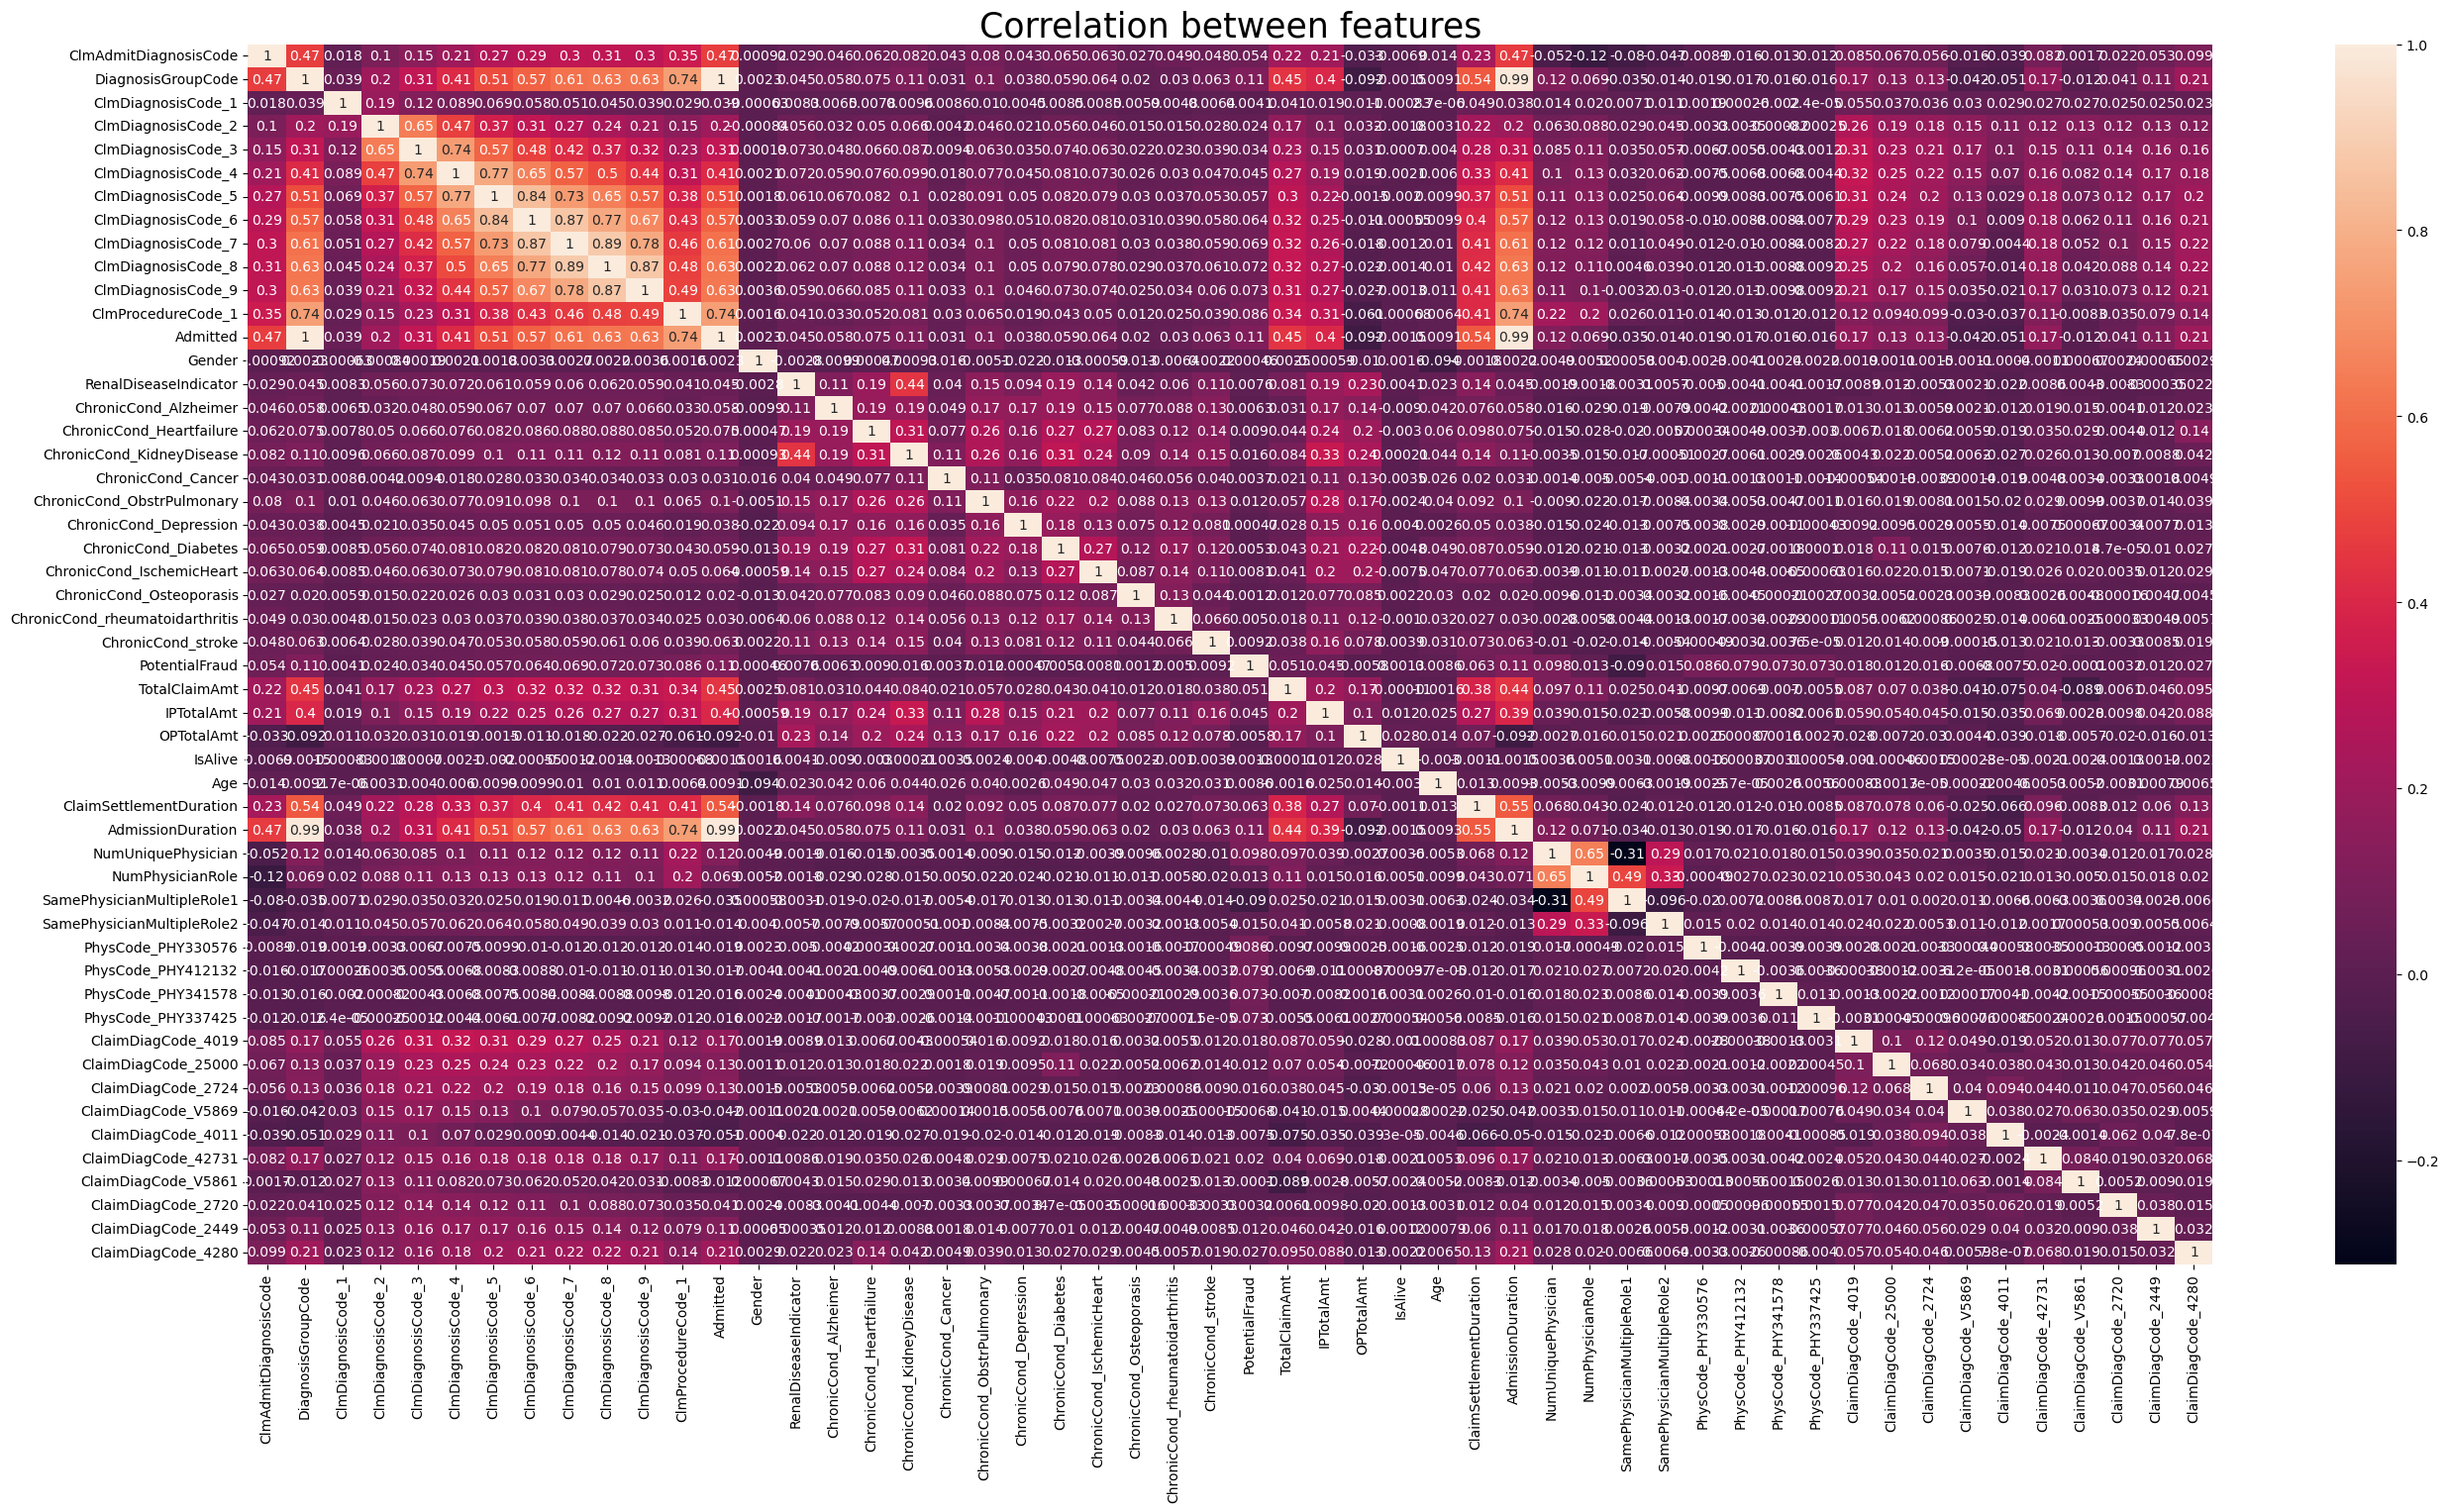

In [39]:
# Correlation plot
# Shows how strongly or weakly the features are correlated
plt.figure(figsize = (32, 16))
sns.heatmap(claim_data.corr(method = 'spearman'), annot = True)
plt.title('Correlation between features', fontsize = 25)

- The heatmap shows the correlation coefficients between pairs of features in the dataset.

In [40]:
# Defining a correlation matrix
correlation_matrix = claim_data.corr(method = 'spearman')

# Coefficients of pairs of features in descending order
feature_pairs = sorted(
    [(feature1, feature2, correlation_matrix.loc[feature1, feature2]) 
     for feature1 in correlation_matrix.columns
     for feature2 in correlation_matrix.columns
     if feature1 != feature2],
    key = lambda x: abs(x[2]),  # Sort by the absolute coefficient value in descending order
    reverse = True
)

# Displaying the coefficients
for feature1, feature2, coefficient in feature_pairs:
    print(f'Correlation between {feature1} and {feature2}: {coefficient}')

Correlation between DiagnosisGroupCode and Admitted: 1.0
Correlation between Admitted and DiagnosisGroupCode: 1.0
Correlation between DiagnosisGroupCode and AdmissionDuration: 0.9910239264831704
Correlation between Admitted and AdmissionDuration: 0.9910239264831704
Correlation between AdmissionDuration and DiagnosisGroupCode: 0.9910239264831704
Correlation between AdmissionDuration and Admitted: 0.9910239264831704
Correlation between ClmDiagnosisCode_7 and ClmDiagnosisCode_8: 0.8872541098547779
Correlation between ClmDiagnosisCode_8 and ClmDiagnosisCode_7: 0.8872541098547779
Correlation between ClmDiagnosisCode_8 and ClmDiagnosisCode_9: 0.8745217503202507
Correlation between ClmDiagnosisCode_9 and ClmDiagnosisCode_8: 0.8745217503202507
Correlation between ClmDiagnosisCode_6 and ClmDiagnosisCode_7: 0.8689835934581637
Correlation between ClmDiagnosisCode_7 and ClmDiagnosisCode_6: 0.8689835934581637
Correlation between ClmDiagnosisCode_5 and ClmDiagnosisCode_6: 0.8427328254254965
Correlat

In [41]:
target_correlations = correlation_matrix['PotentialFraud']

# Coefficients of features with the target variable in descending order
feature_target_pairs = sorted(
    [(feature, 'PotentialFraud', target_correlations[feature])
     for feature in correlation_matrix.columns
     if feature != 'PotentialFraud'],
    key = lambda x: abs(x[2]),  # Sort by the absolute value of the coefficient in descending order
    reverse = True
)

# Displaying the coefficients with the target variable
for feature, target_variable, coefficient in feature_target_pairs:
    print(f'Correlation between {feature} and {target_variable}: {coefficient}')

Correlation between DiagnosisGroupCode and PotentialFraud: 0.11340143443453231
Correlation between Admitted and PotentialFraud: 0.11340143443453231
Correlation between AdmissionDuration and PotentialFraud: 0.11231652167992497
Correlation between NumUniquePhysician and PotentialFraud: 0.09774132698683496
Correlation between SamePhysicianMultipleRole1 and PotentialFraud: -0.08957461272619192
Correlation between PhysCode_PHY330576 and PotentialFraud: 0.0863424594235125
Correlation between ClmProcedureCode_1 and PotentialFraud: 0.08551986064353549
Correlation between PhysCode_PHY412132 and PotentialFraud: 0.0791480651027065
Correlation between PhysCode_PHY341578 and PotentialFraud: 0.07330805762964407
Correlation between PhysCode_PHY337425 and PotentialFraud: 0.07288760720373667
Correlation between ClmDiagnosisCode_9 and PotentialFraud: 0.07253364146134952
Correlation between ClmDiagnosisCode_8 and PotentialFraud: 0.07188734036445668
Correlation between ClmDiagnosisCode_7 and PotentialFrau

Handling highly correlated pairs of features:
- One of the highly correlated features having a lesser correlation coefficient with the target variable (PotentialFraud) is dropped.

In [42]:
# Handling highly correlated pairs of features:
# One of the highly correlated features having a lesser correlation coefficient with the target variable (PotentialFraud) is dropped.
# Defining columns to be dropped from the dataset
cols_to_drop = ['DiagnosisGroupCode', 'AdmissionDuration', 'ClmDiagnosisCode_8', 'ClmDiagnosisCode_7',
                'ClmDiagnosisCode_6', 'ClmDiagnosisCode_5', 'ClmDiagnosisCode_4', 'ClmProcedureCode_1']
claim_data.drop(columns = cols_to_drop, inplace = True)

# New shape of data
claim_data.shape

(558211, 44)

Text(0.5, 1.0, 'Correlation between features')

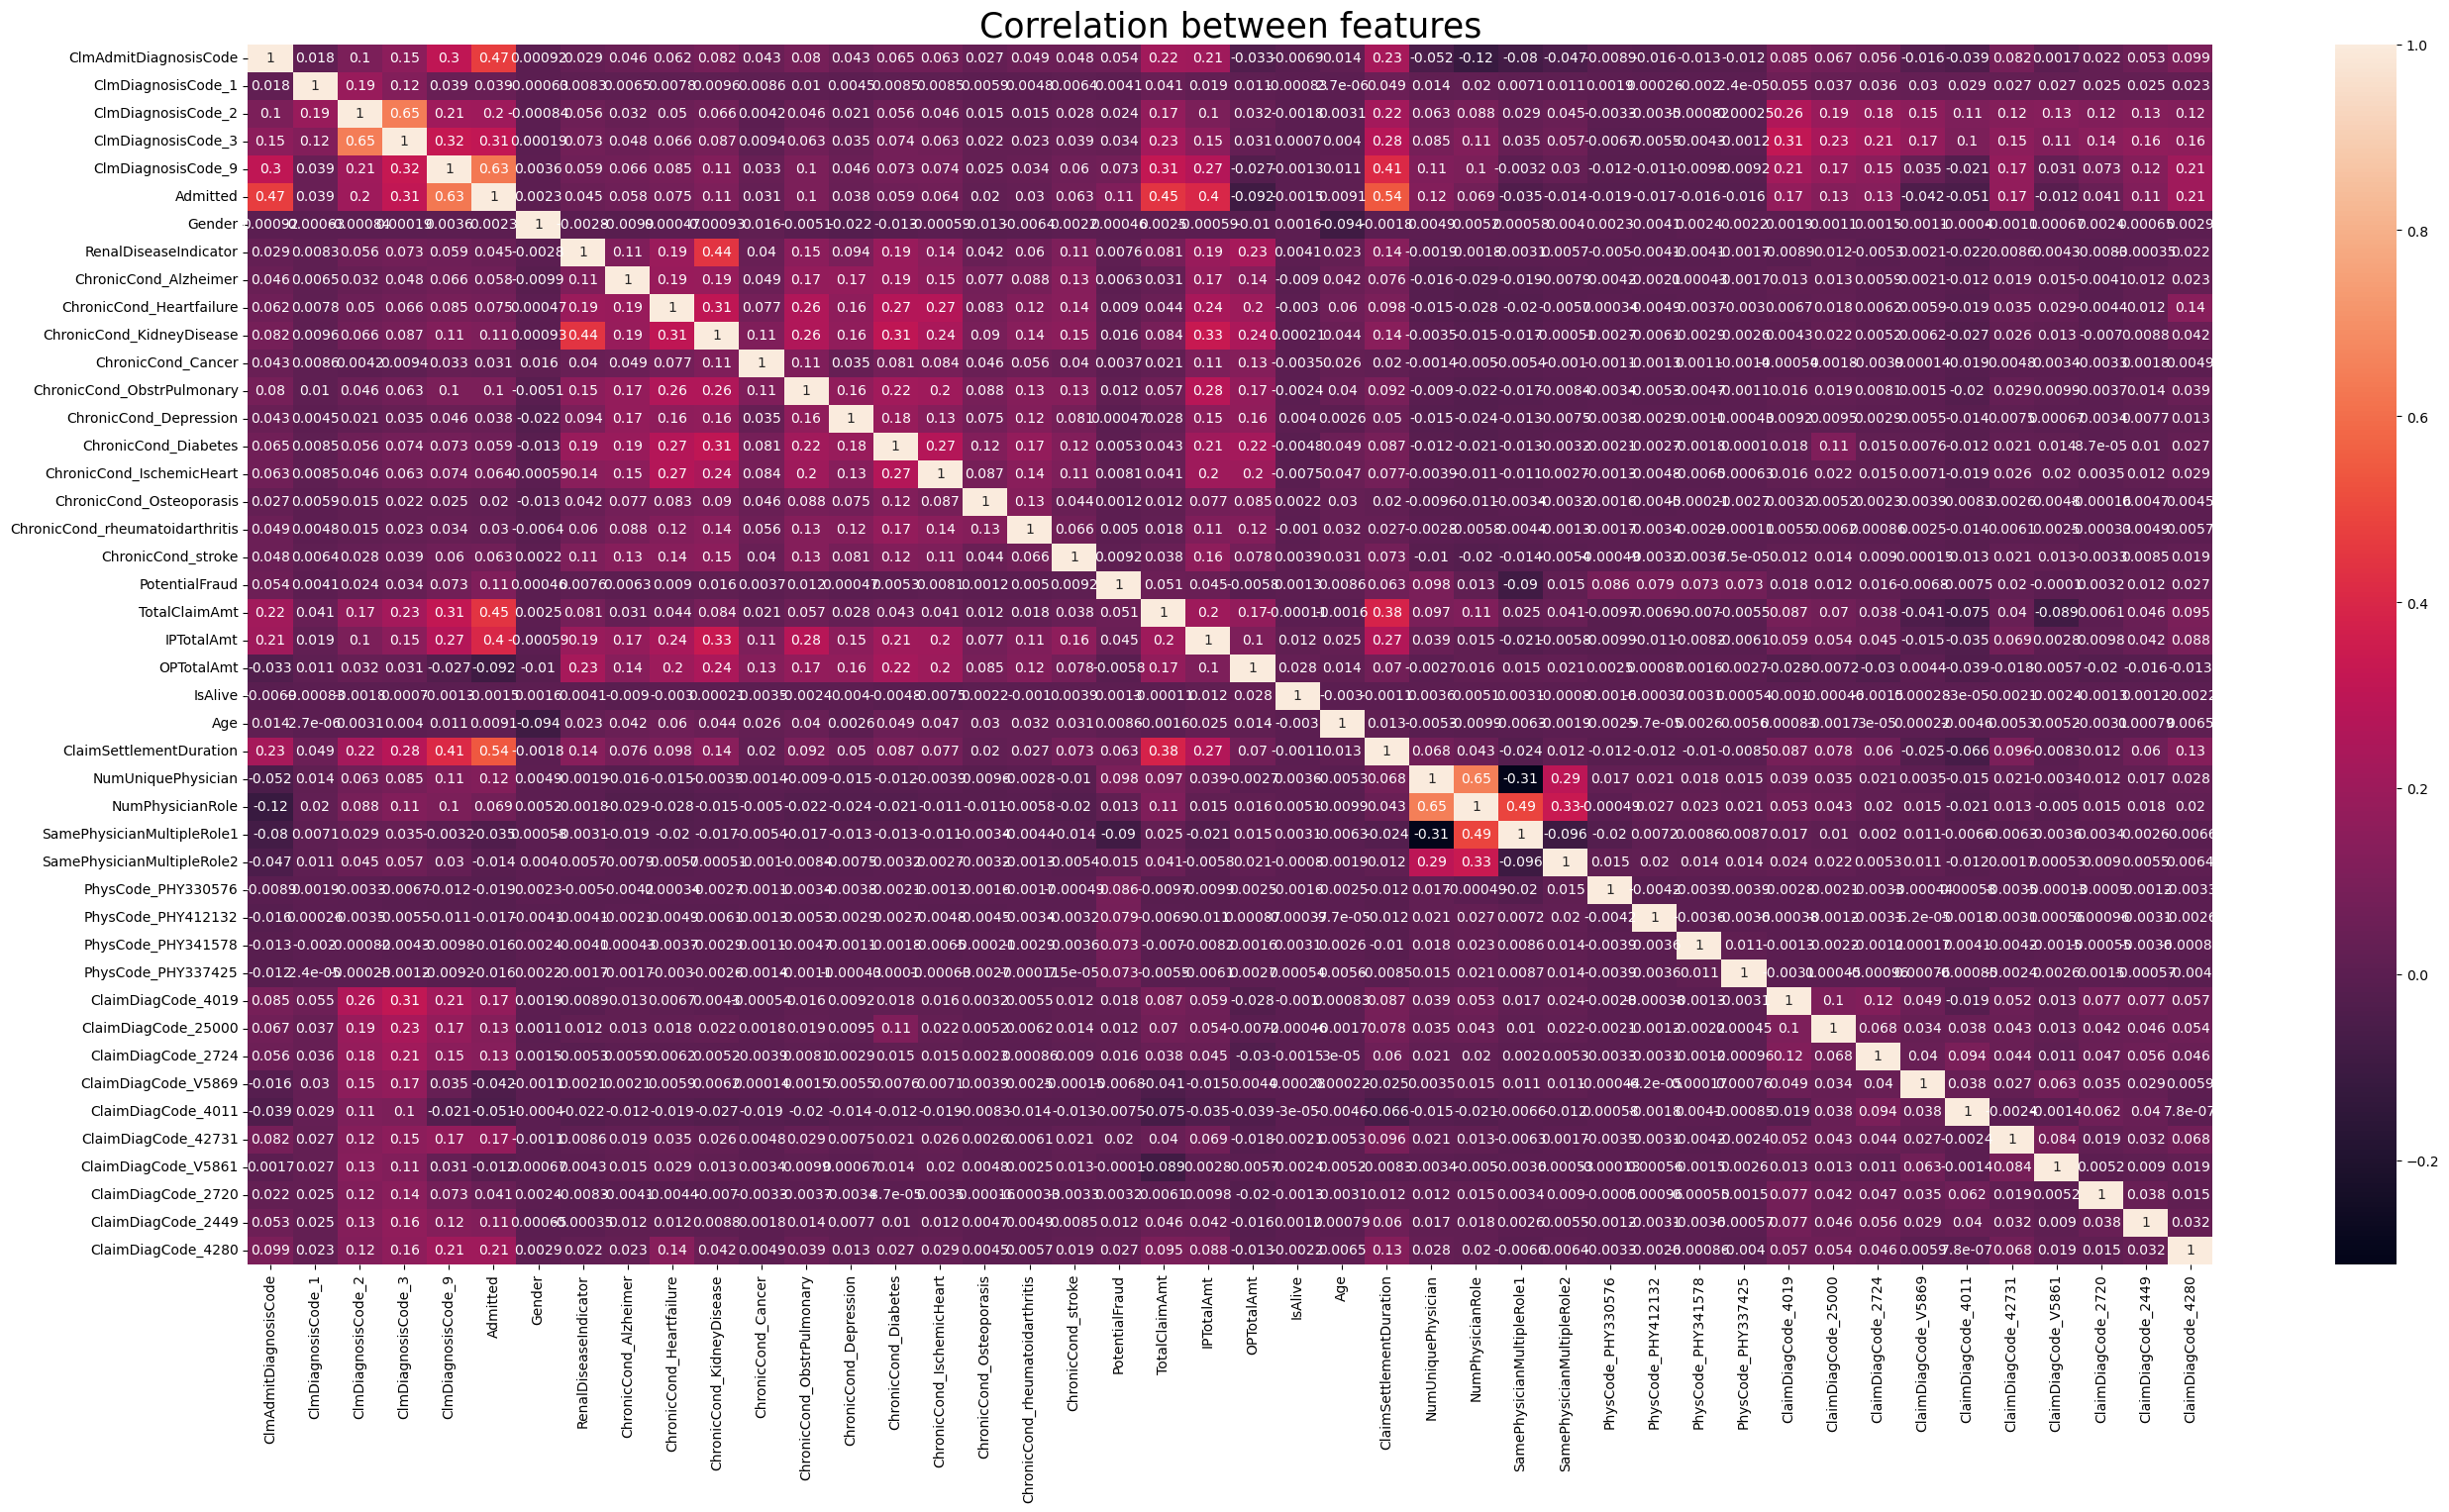

In [43]:
# Correlation plot after handling highly correlated features
plt.figure(figsize = (32, 16))
sns.heatmap(claim_data.corr(method = 'spearman'), annot = True)
plt.title('Correlation between features', fontsize = 25)

In [44]:
# first 5 rows of the cleaned claim data
claim_data.head()

,ClmAdmitDiagnosisCode,ClmDiagnosisCode_1,ClmDiagnosisCode_2,ClmDiagnosisCode_3,ClmDiagnosisCode_9,Admitted,Gender,RenalDiseaseIndicator,ChronicCond_Alzheimer,ChronicCond_Heartfailure,ChronicCond_KidneyDisease,ChronicCond_Cancer,ChronicCond_ObstrPulmonary,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,PotentialFraud,TotalClaimAmt,IPTotalAmt,OPTotalAmt,IsAlive,Age,ClaimSettlementDuration,NumUniquePhysician,NumPhysicianRole,SamePhysicianMultipleRole1,SamePhysicianMultipleRole2,PhysCode_PHY330576,PhysCode_PHY412132,PhysCode_PHY341578,PhysCode_PHY337425,ClaimDiagCode_4019,ClaimDiagCode_25000,ClaimDiagCode_2724,ClaimDiagCode_V5869,ClaimDiagCode_4011,ClaimDiagCode_42731,ClaimDiagCode_V5861,ClaimDiagCode_2720,ClaimDiagCode_2449,ClaimDiagCode_4280
0,1,1,1,1,1,1,1,0,1,0,1,0,0,1,1,1,0,1,1,1,27068.0,39204,130,1,67,6,1,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0
1,0,1,1,1,1,0,1,0,1,1,1,0,0,0,0,1,0,0,0,1,50.0,26136,650,1,78,0,2,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,1,1,1,1,1,1,0,0,1,1,1,0,1,0,0,1,0,0,0,1,20068.0,20068,120,1,96,12,3,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,18068.0,18068,1590,1,87,18,1,2,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
4,1,1,1,1,0,1,0,0,0,1,0,0,1,0,1,1,1,1,0,1,14068.0,29136,610,1,80,4,3,3,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0


In [45]:
# Saving the cleaned claims data for pre-processing and modelling
claim_data.to_csv('C:/claims_fraud_datasets/cleanedclaim_data.csv', index = False)

# 4. Exploratory Data Analysis (EDA)

EDA was conducted to get an understanding of the already prepared data, the data variables, and the relationship between some of the variables.

1. Summary statistics of the claim data

In [46]:
claim_data.describe()

,ClmAdmitDiagnosisCode,ClmDiagnosisCode_1,ClmDiagnosisCode_2,ClmDiagnosisCode_3,ClmDiagnosisCode_9,Admitted,Gender,RenalDiseaseIndicator,ChronicCond_Alzheimer,ChronicCond_Heartfailure,ChronicCond_KidneyDisease,ChronicCond_Cancer,ChronicCond_ObstrPulmonary,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,PotentialFraud,TotalClaimAmt,IPTotalAmt,OPTotalAmt,IsAlive,Age,ClaimSettlementDuration,NumUniquePhysician,NumPhysicianRole,SamePhysicianMultipleRole1,SamePhysicianMultipleRole2,PhysCode_PHY330576,PhysCode_PHY412132,PhysCode_PHY341578,PhysCode_PHY337425,ClaimDiagCode_4019,ClaimDiagCode_25000,ClaimDiagCode_2724,ClaimDiagCode_V5869,ClaimDiagCode_4011,ClaimDiagCode_42731,ClaimDiagCode_V5861,ClaimDiagCode_2720,ClaimDiagCode_2449,ClaimDiagCode_4280
count,558211.000000,558211.000000,558211.000000,558211.000000,558211.000000,558211.000000,558211.000000,558211.000000,558211.000000,558211.000000,558211.000000,558211.000000,558211.000000,558211.000000,558211.000000,558211.000000,558211.000000,558211.000000,558211.000000,558211.000000,558211.000000,558211.000000,558211.000000,558211.000000,558211.000000,558211.000000,558211.000000,558211.000000,558211.000000,558211.000000,558211.000000,558211.000000,558211.000000,558211.000000,558211.000000,558211.000000,558211.000000,558211.000000,558211.000000,558211.000000,558211.000000,558211.000000,558211.000000,558211.000000
mean,0.261369,0.981274,0.649584,0.435418,0.074909,0.072507,0.421162,0.196786,0.401868,0.590427,0.412002,0.151385,0.312930,0.434807,0.705395,0.759265,0.317647,0.311171,0.101720,0.381211,1075.306922,5796.728273,2927.924093,0.992600,73.852368,1.727940,1.292981,1.560138,0.209654,0.033899,0.005299,0.005039,0.004398,0.004341,0.137738,0.066697,0.063978,0.044575,0.042579,0.035956,0.035798,0.032703,0.031402,0.027982
std,0.439381,0.135555,0.477101,0.495812,0.263245,0.259325,0.493746,0.397569,0.490276,0.491755,0.492196,0.358424,0.463687,0.495732,0.455866,0.427530,0.465562,0.462973,0.302279,0.485685,4005.967712,12576.664057,4752.549505,0.085707,13.020485,4.904984,0.505266,0.639954,0.407062,0.180970,0.082010,0.087858,0.082379,0.081924,0.344703,0.249518,0.244889,0.206845,0.202136,0.186334,0.186730,0.178029,0.174402,0.165020
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6932.000000,-70.000000,0.000000,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,40.000000,0.000000,700.000000,1.000000,68.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,90.000000,0.000000,1640.000000,1.000000,75.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,370.000000,7068.000000,3360.000000,1.000000,83.000000,0.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0000

- It is observed that there are 558211 claim records under consideration in this project. An average of $1075.3 total claim is payable for a claim, with a min of $0 and max of $126068. Also, the standard deviation of total claim amount payable is observed to be around $4005.9.

2. Distribution of fraudulent and genuine claims

In [47]:
# distribution of fraud: determining the count of fraudulent claims
claim_data['PotentialFraud'].value_counts(normalize = True)*100

PotentialFraud
0    61.878931
1    38.121069
Name: proportion, dtype: float64

- 38% of the health insurance claims are fraudulent.

3. Claim settlement duration

In [52]:
# How much time in days (on average) do potential fraudulent claims take to be settled
claim_data[claim_data['PotentialFraud'] == 1]['ClaimSettlementDuration'].mean()


1.9069155435252543

- Potential fraudulent claims take 2 days on average to be settled.

4. Maximum claim settlement duration of genuine claims for an outpatient beneficiary

In [49]:
# Maximum claim settlement duration (in days) of genuine claims for an outpatient beneficiary
claim_data[(claim_data['PotentialFraud'] == 0) & (claim_data['Admitted'] == 0)]['ClaimSettlementDuration'].max()

21

- It takes a maximum of 21 days for a genuine claim to be settled for an outpatient beneficiary.

5. Distribution of fraudulent and genuine claims based on gender of the beneficiary

In [50]:
# Distribution of fraudulent and genuine claims based on gender of the beneficiary
pd.crosstab(claim_data['PotentialFraud'], claim_data['Gender'], normalize = True)

Gender,0,1
PotentialFraud,,
0,0.358289,0.260500
1,0.220549,0.160661


- Most claims are genuine and they are mostly claims of male beneficiaries.